<a href="https://colab.research.google.com/github/bindubb/ADS_1/blob/main/stellar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from tabulate import tabulate
import pickle

In [2]:
stellar_data = pd.read_csv("//content//star_classification.csv")

In [3]:
stellar_data.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [4]:
stellar_data.tail()

obj_ID       alpha      delta         u         g         r  \
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
99995  21.30548  20.73569    7778       301        2       581  1.055431e+19   
99996  19.75759  19.41526    7917       301        1       289  8.586351e+18   
99997  17.69034  17.35221    5314       301        4       308  3.112008e+18   
99998  19.07254  18.62482    3650       301        4       131  7.601080e+18   
99999  20.00959  19.28075    3650       301        4        60  8.343152e+18   

        class  redshift  plate    MJD  fiber_ID  
99995  GALAXY  0.000000   9374  57749       438  
99996  GALAXY  0.404895   7626  56934       866  
99997  GALAXY  0.143366   2764  54535        74  
99998  GALAXY  0.455040   6751  56368       470  
99999  GALAXY  0.542944   7410  57104       851

In [5]:
stellar_data.rename(columns = {"u" : "Ultravoilet", "g" : "Green", "r":"Red", "i" : "Near Infrared", "z": "Infrared" }, inplace = True)

In [6]:
stellar_data.head()

obj_ID       alpha      delta  Ultravoilet     Green       Red  \
0  1.237661e+18  135.689107  32.494632     23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185     24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444     25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828     22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866     19.43718  17.58028  16.49747   

   Near Infrared  Infrared  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0       19.16573  18.79371    3606       301        2        79  6.543777e+18   
1       21.16812  21.61427    4518       301        5       119  1.176014e+19   
2       19.34857  18.94827    3606       301        2       120  5.152200e+18   
3       20.50454  19.25010    4192       301        3       214  1.030107e+19   
4       15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [7]:
stellar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   obj_ID         100000 non-null  float64
 1   alpha          100000 non-null  float64
 2   delta          100000 non-null  float64
 3   Ultravoilet    100000 non-null  float64
 4   Green          100000 non-null  float64
 5   Red            100000 non-null  float64
 6   Near Infrared  100000 non-null  float64
 7   Infrared       100000 non-null  float64
 8   run_ID         100000 non-null  int64  
 9   rerun_ID       100000 non-null  int64  
 10  cam_col        100000 non-null  int64  
 11  field_ID       100000 non-null  int64  
 12  spec_obj_ID    100000 non-null  float64
 13  class          100000 non-null  object 
 14  redshift       100000 non-null  float64
 15  plate          100000 non-null  int64  
 16  MJD            100000 non-null  int64  
 17  fiber_ID       100000 non-null

In [8]:
stellar_data.describe()

obj_ID          alpha          delta    Ultravoilet  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

               Green            Red  Near Infrared       Infrared  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783882e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324016e+18   
min       109.000000     301.0       1.000000      11.000000  2.995191e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844138e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614883e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332144e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412694e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

In [9]:
print('Number of Null values present:\n' ,stellar_data.isnull().sum())

Number of Null values present:
 obj_ID           0
alpha            0
delta            0
Ultravoilet      0
Green            0
Red              0
Near Infrared    0
Infrared         0
run_ID           0
rerun_ID         0
cam_col          0
field_ID         0
spec_obj_ID      0
class            0
redshift         0
plate            0
MJD              0
fiber_ID         0
dtype: int64


In [10]:
print("The shape of the dataset: ", stellar_data.shape)

The shape of the dataset:  (100000, 18)


In [11]:
print("Number of duplicate values present :\n", stellar_data.duplicated().sum())

Number of duplicate values present :
 0


In [12]:
print("The count of total values of the target variable :\n", stellar_data['class'].value_counts())

The count of total values of the target variable :
 class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64


In [13]:
features = ['alpha', 'delta', 'Ultravoilet', 'Green', 'Red', 'Near Infrared', 'Infrared', 'redshift']

In [14]:
stellar_data[features].describe().T

count        mean        std          min         25%  \
alpha          100000.0  177.629117  96.502241     0.005528  127.518222   
delta          100000.0   24.135305  19.644665   -18.785328    5.146771   
Ultravoilet    100000.0   21.980468  31.769291 -9999.000000   20.352353   
Green          100000.0   20.531387  31.750292 -9999.000000   18.965230   
Red            100000.0   19.645762   1.854760     9.822070   18.135828   
Near Infrared  100000.0   19.084854   1.757895     9.469903   17.732285   
Infrared       100000.0   18.668810  31.728152 -9999.000000   17.460677   
redshift       100000.0    0.576661   0.730707    -0.009971    0.054517   

                      50%         75%         max  
alpha          180.900700  233.895005  359.999810  
delta           23.645922   39.901550   83.000519  
Ultravoilet     22.179135   23.687440   32.781390  
Green           21.099835   22.123767   31.602240  
Red             20.125290   21.044785   29.571860  
Near Infrared   19.405145   20.396495   32.141470  
Infrared        19.004595   19.921120   29.383740  
redshift         0.424173    0.704154    7.011245

In [15]:
target = stellar_data["class"]

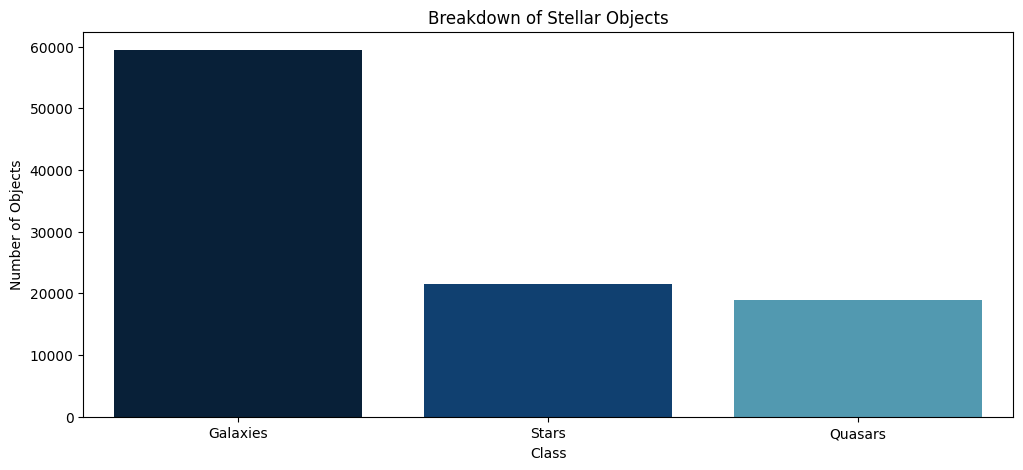

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64


In [16]:
class_breakdown = stellar_data["class"].value_counts()
fig, (bar) = plt.subplots( figsize=(12, 5))
classes = ["Galaxies", "Stars", "Quasars"]


bar.set_title("Breakdown of Stellar Objects")
bar.set_xlabel("Class")
bar.set_ylabel("Number of Objects")
sns.barplot(x=classes, y=class_breakdown.values,
            palette= "ocean", ax=bar)
plt.show()

print(stellar_data["class"].value_counts())

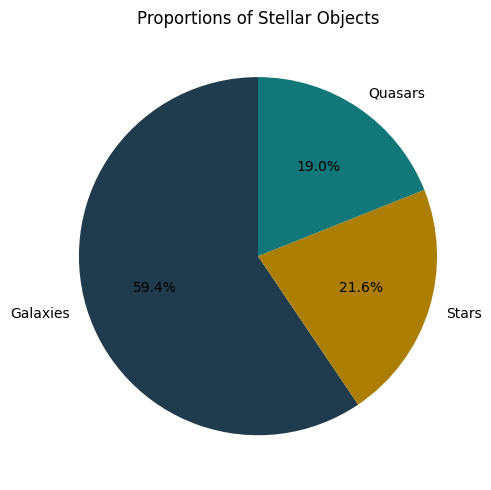

In [17]:
class_breakdown = stellar_data["class"].value_counts()
fig, ( pie) = plt.subplots( figsize=(12, 5))
color_map_name = {'GALAXY': "#1f3b4d", 'STAR': "#ac7e04", 'QSO': "#117779"}
classes = ["Galaxies", "Stars", "Quasars"]


pie.set_title("Proportions of Stellar Objects")
pie.pie(class_breakdown.values, labels=classes, autopct='%1.1f%%',
        colors=color_map_name.values(), startangle=90)

plt.tight_layout()
plt.show()



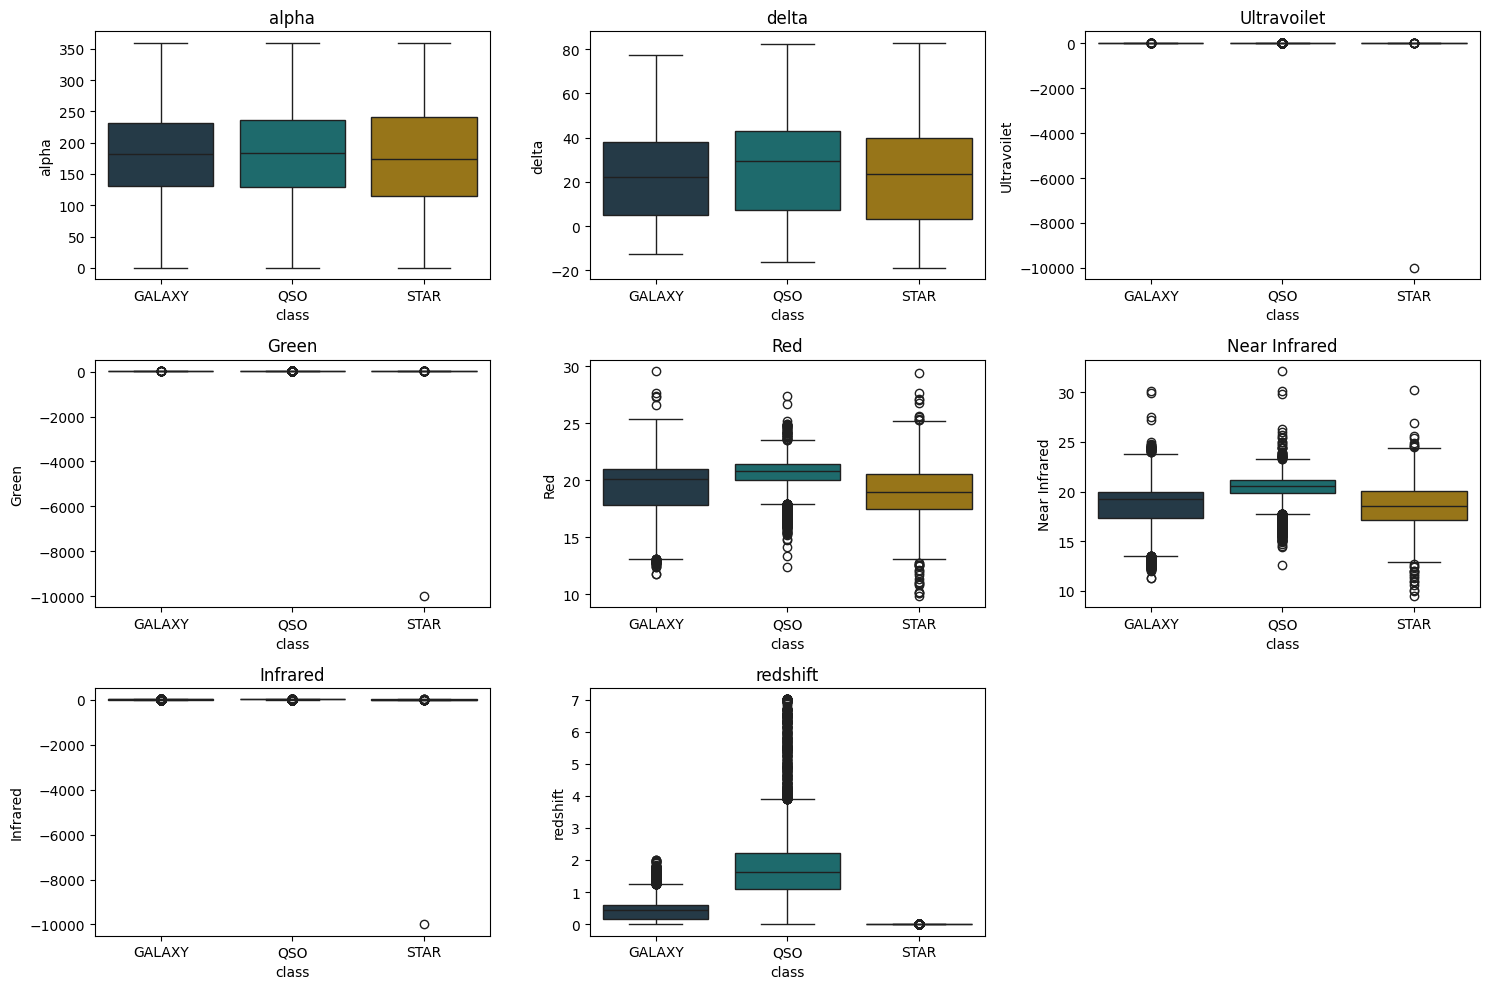

In [18]:
import matplotlib.pyplot as plt
# Define features and target
features = ['alpha', 'delta', 'Ultravoilet', 'Green', 'Red', 'Near Infrared', 'Infrared', 'redshift']
target = stellar_data["class"]

# Create box plots for each feature with target
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
  plt.subplot(3, 3, i+1)
  sns.boxplot(x='class', y=feature, data=stellar_data, palette={'GALAXY': "#1f3b4d", 'STAR': "#ac7e04", 'QSO': "#117779"})
  plt.title(feature)
plt.tight_layout()
plt.show()


In [19]:
display(stellar_data[stellar_data['Green'] == min(stellar_data['Green'])])

obj_ID       alpha     delta  Ultravoilet   Green      Red  \
79543  1.237649e+18  224.006526 -0.624304      -9999.0 -9999.0  18.1656   

       Near Infrared  Infrared  run_ID  rerun_ID  cam_col  field_ID  \
79543       18.01675   -9999.0     752       301        2       537   

        spec_obj_ID class  redshift  plate    MJD  fiber_ID  
79543  3.731277e+18  STAR  0.000089   3314  54970       162

In [20]:
display(stellar_data[stellar_data['Ultravoilet'] == min(stellar_data['Ultravoilet'])])

obj_ID       alpha     delta  Ultravoilet   Green      Red  \
79543  1.237649e+18  224.006526 -0.624304      -9999.0 -9999.0  18.1656   

       Near Infrared  Infrared  run_ID  rerun_ID  cam_col  field_ID  \
79543       18.01675   -9999.0     752       301        2       537   

        spec_obj_ID class  redshift  plate    MJD  fiber_ID  
79543  3.731277e+18  STAR  0.000089   3314  54970       162

In [21]:
stellar_data = stellar_data.drop(index=[79543])
print("The shape of the dataset: ", (stellar_data.shape))

The shape of the dataset:  (99999, 18)


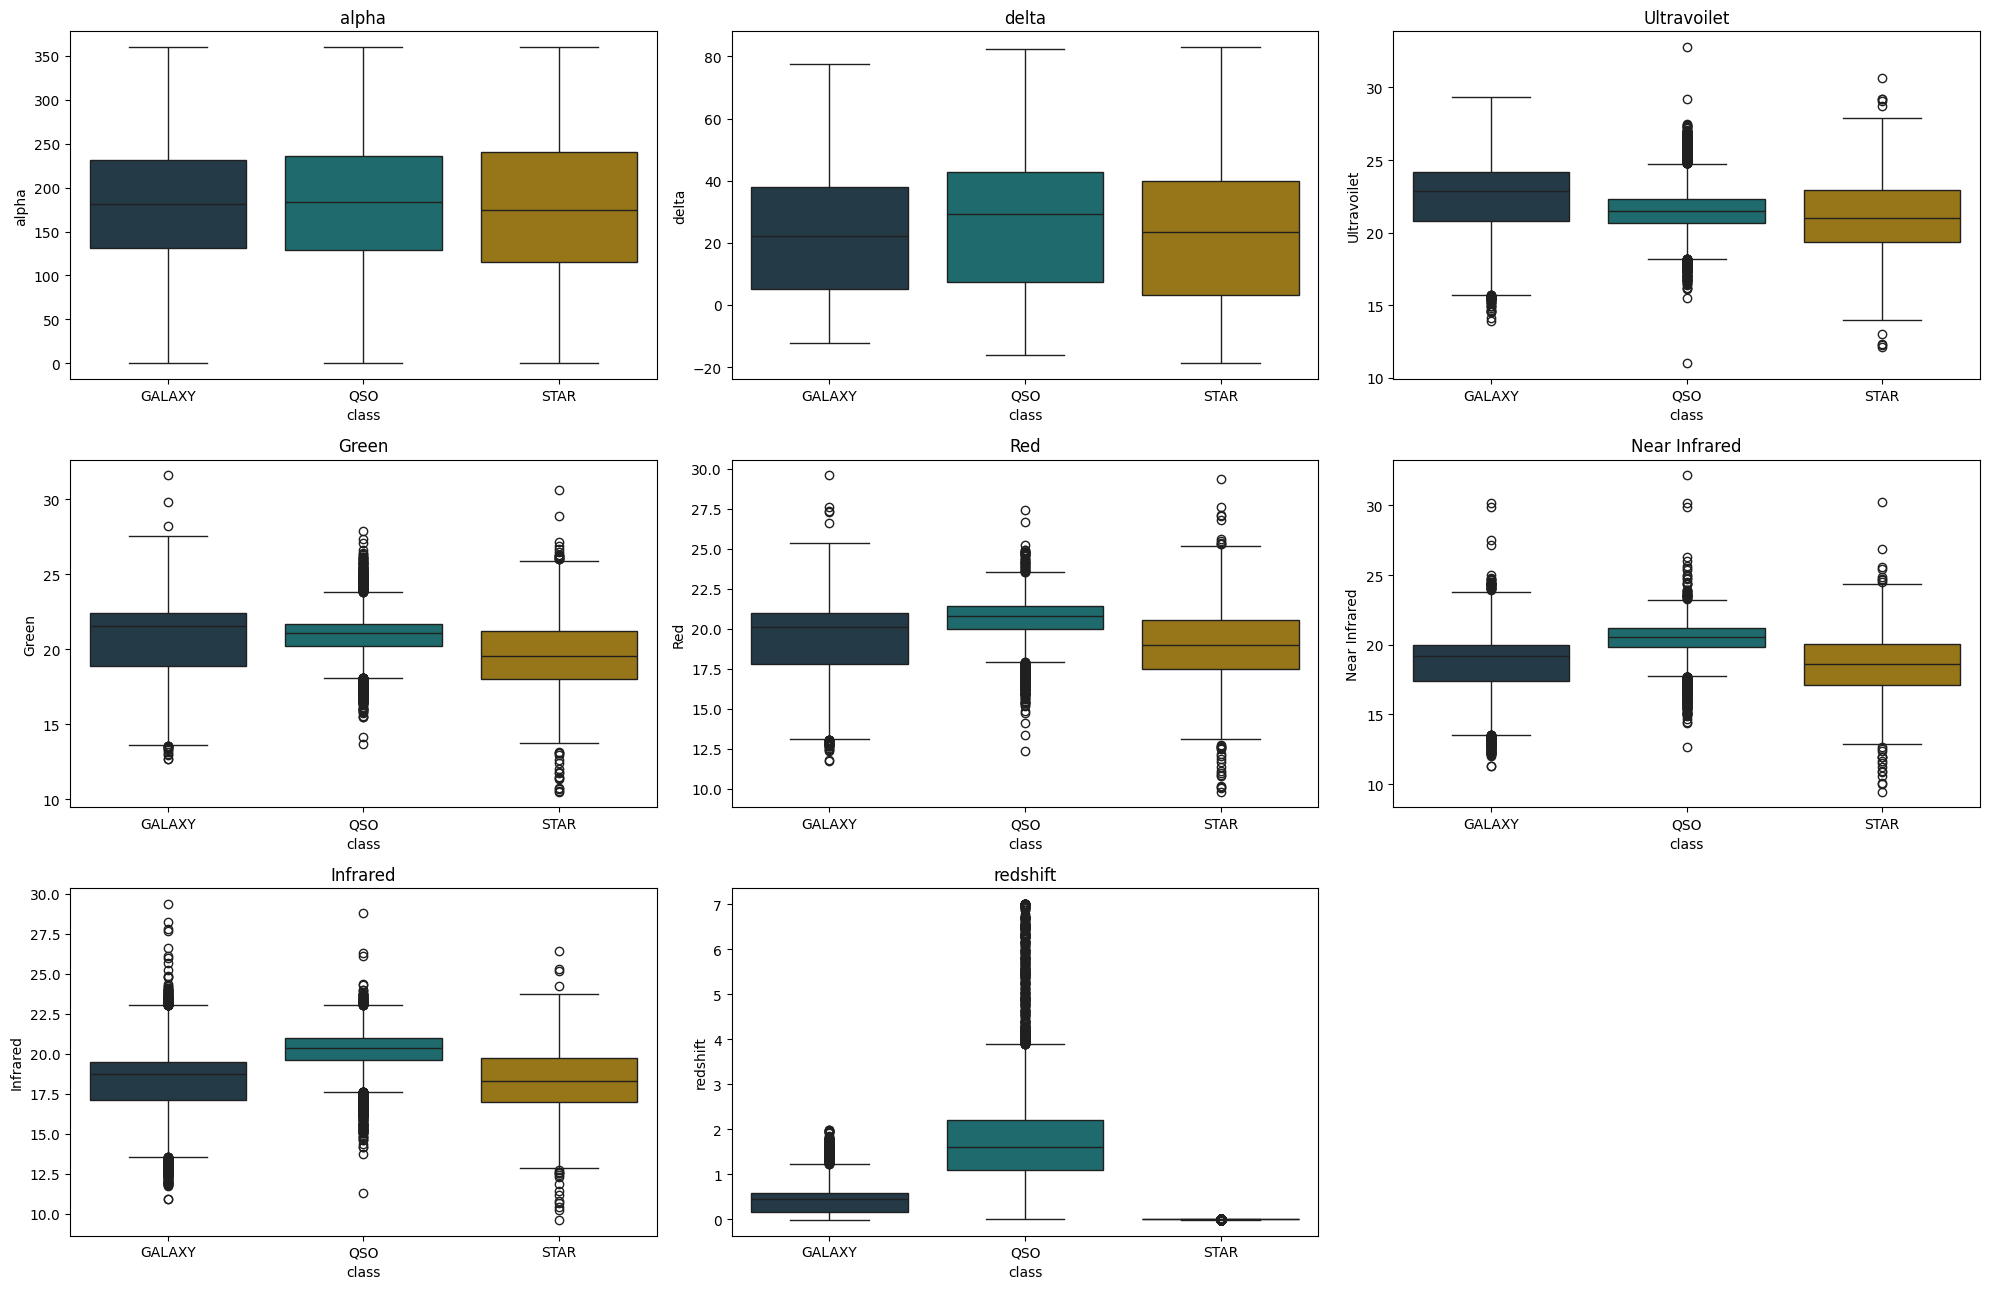

In [22]:
import matplotlib.pyplot as plt
# Define features and target
features = ['alpha', 'delta', 'Ultravoilet', 'Green', 'Red', 'Near Infrared', 'Infrared', 'redshift']
target = stellar_data["class"]

# Create box plots for each feature with target
plt.figure(figsize=(20, 13))
for i, feature in enumerate(features):
  plt.subplot(3, 3, i+1)
  sns.boxplot(x='class', y=feature, data=stellar_data, palette={'GALAXY': "#1f3b4d", 'STAR': "#ac7e04", 'QSO': "#117779"})
  plt.title(feature)
plt.tight_layout()
plt.show()

<Axes: ylabel='redshift'>

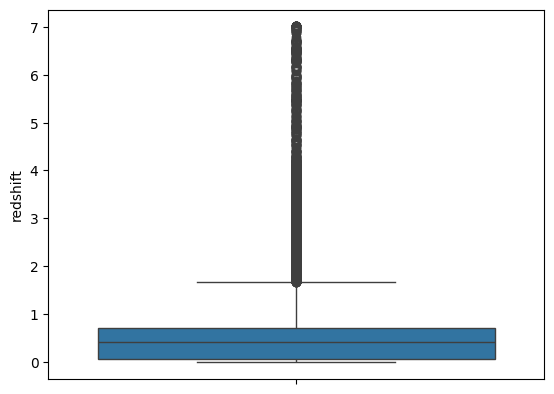

In [23]:
sns.boxplot(stellar_data['redshift'])



<Axes: xlabel='redshift', ylabel='Density'>

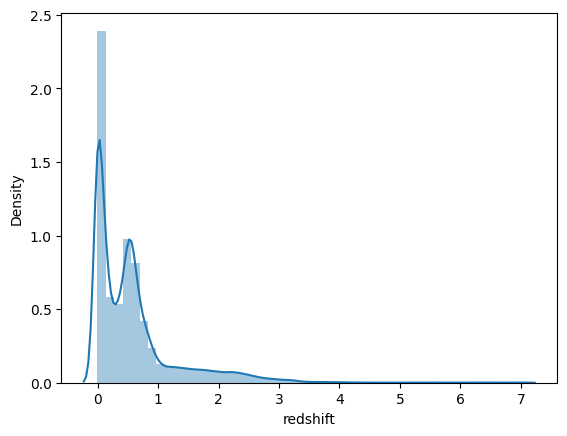

In [24]:
sns.distplot(stellar_data["redshift"])

In [25]:
percentile25 = stellar_data['redshift'].quantile(0.25)
print("Percentile25:",percentile25)
percentile75 = stellar_data['redshift'].quantile(0.75)
print("Percentile75:", percentile75)
iqr = percentile75 - percentile25
print("IQR:", iqr)


Percentile25: 0.054521694999999995
Percentile75: 0.7041720499999999
IQR: 0.6496503549999999


In [26]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 1.6786475824999998
Lower limit -0.9199538374999998


In [27]:
stellar_data[stellar_data['redshift'] > upper_limit]

obj_ID       alpha      delta  Ultravoilet     Green       Red  \
17     1.237679e+18    1.494389   3.291746     20.38562  20.40514  20.29996   
23     1.237658e+18  145.883006  47.300484     21.73992  21.53095  21.26763   
47     1.237668e+18  228.447728  12.745032     22.36261  21.71060  21.59630   
71     1.237658e+18  178.504616  54.379157     21.77434  21.65529  21.77547   
83     1.237662e+18  187.973425  42.288816     23.33354  22.08951  21.85797   
...             ...         ...        ...          ...       ...       ...   
99900  1.237680e+18  352.879980  27.433579     19.77479  19.29704  19.18981   
99926  1.237658e+18  148.560394  50.223285     22.08232  21.43803  21.41271   
99938  1.237680e+18  355.179454  27.714932     21.50280  21.59604  21.42026   
99949  1.237679e+18   34.602921  31.514091     22.45167  21.19384  20.60153   
99980  1.237662e+18  225.566376  32.118746     20.53765  19.93229  19.77495   

       Near Infrared  Infrared  run_ID  rerun_ID  cam_col  field_ID  \
17          20.05918  19.89044    7712       301        5       339   
23          21.36257  21.15861    2821       301        2        33   
47          21.60179  21.12727    5322       301        3       125   
71          21.72382  21.66425    2821       301        2       177   
83          22.16238  22.55171    3893       301        3       190   
...              ...       ...     ...       ...      ...       ...   
99900       19.16206  19.01953    8103       301        5        54   
99926       21.32197  20.83465    2831       301        1        62   
99938       21.01734  20.47349    8103       301        5        67   
99949       20.56568  20.14365    7781       301        4       148   
99980       19.72304  19.40202    3900       301        3       598   

        spec_obj_ID class  redshift  plate    MJD  fiber_ID  
17     9.843824e+18   QSO  2.031528   8743  57663       295  
23     8.228240e+18   QSO  2.075680   7308  56709       596  
47     6.179027e+18   QSO  2.689002   5488  56013       320  
71     9.264088e+18   QSO  1.939080   8228  57423       667  
83     9.439788e+18   QSO  2.188856   8384  57513       886  
...             ...   ...       ...    ...    ...       ...  
99900  7.094483e+18   QSO  2.551272   6301  56543       682  
99926  8.210332e+18   QSO  2.291461   7292  56709       980  
99938  8.667300e+18   QSO  1.794403   7698  58013       444  
99949  8.712484e+18   QSO  2.418509   7738  58100       985  
99980  4.357250e+18   QSO  2.488738   3870  55273        62  

[8989 rows x 18 columns]

In [28]:
new_df_cap = stellar_data.copy()

new_df_cap['redshift'] = np.where(
    new_df_cap['redshift'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['redshift'] < lower_limit,
        lower_limit,
        new_df_cap['redshift']
    )
)

In [29]:
new_df_cap.shape


(99999, 18)

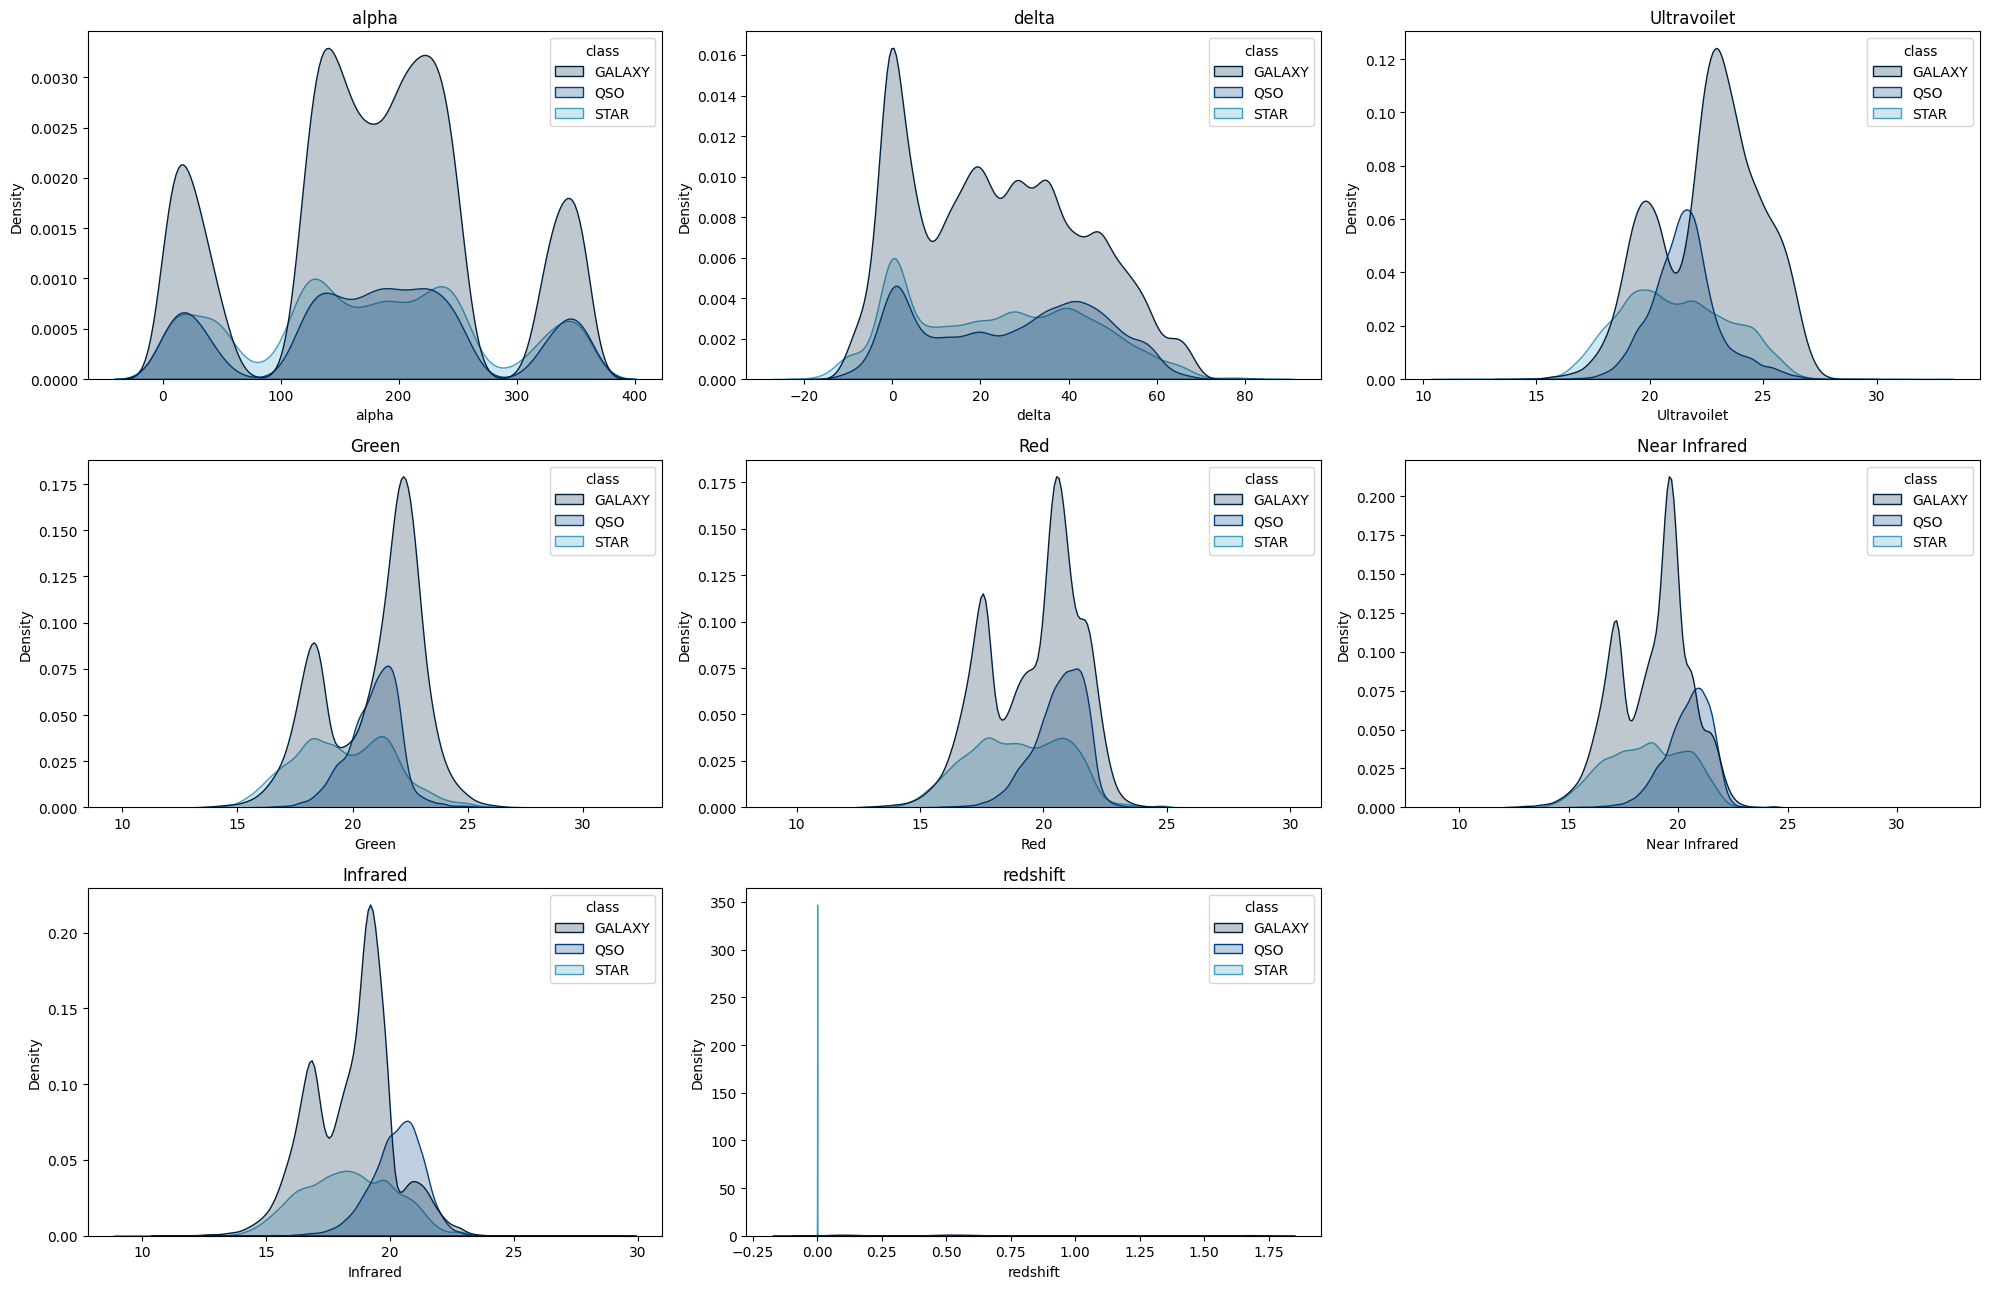

In [30]:

features = ['alpha', 'delta', 'Ultravoilet', 'Green', 'Red', 'Near Infrared', 'Infrared', 'redshift']
target = stellar_data["class"]

# Create box plots for each feature with target
plt.figure(figsize=(20, 13))
for i, feature in enumerate(features):
  plt.subplot(3, 3, i+1)
  sns.kdeplot(data=new_df_cap, x=feature, hue=target, shade=True, palette = "ocean")
  plt.title(feature)
plt.tight_layout()
plt.show()

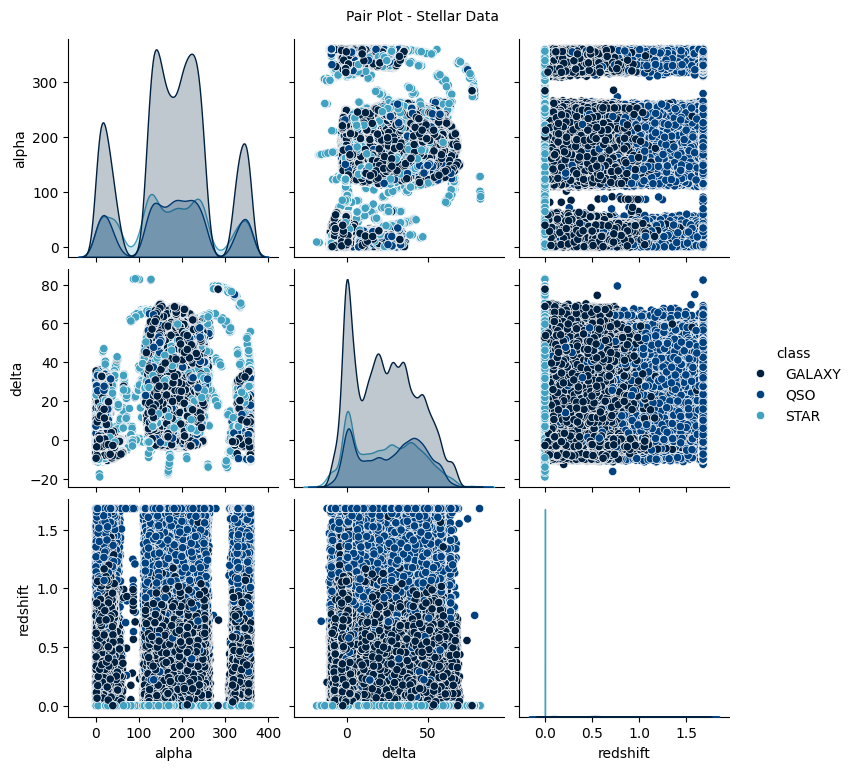

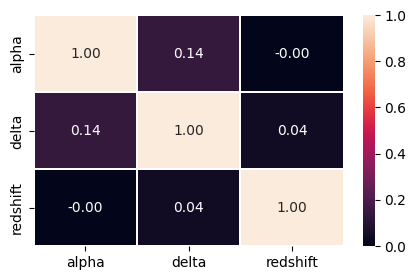

In [31]:
P = sns.pairplot(data=new_df_cap[['alpha', 'delta', 'redshift', 'class']],
                 hue='class', palette = "ocean")
P.fig.suptitle(t='Pair Plot - Stellar Data', y=1.02, fontsize=10)
plt.show()


plt.figure(figsize=(5, 3))
sns.heatmap(data=new_df_cap[['alpha', 'delta', 'redshift']].corr(),
            annot=True, fmt='.2f', linewidths=0.1)
plt.show()


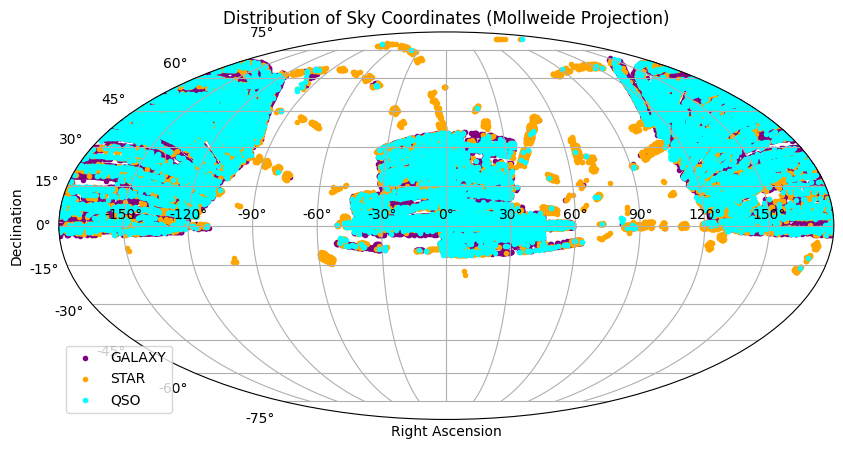

In [32]:


from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

# Extract alpha, delta, and class
alpha = stellar_data['alpha']
delta = stellar_data['delta']
classes = stellar_data['class']

# Convert to SkyCoord objects
coords = SkyCoord(alpha, delta, unit='deg')

# Define new colors for each class
color_map = {'GALAXY': 'purple', 'STAR': 'orange', 'QSO': 'cyan'}

# Create a Mollweide projection
plt.figure(figsize=(10, 6))
plt.subplot(projection="mollweide")

# Plot the coordinates with class-based colors
for c in color_map:
  plt.scatter(coords[classes == c].ra.wrap_at(180 * u.deg).radian,
              coords[classes == c].dec.radian,
              marker='.', color=color_map[c], label=c)

# Set labels and title
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.title('Distribution of Sky Coordinates (Mollweide Projection)')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

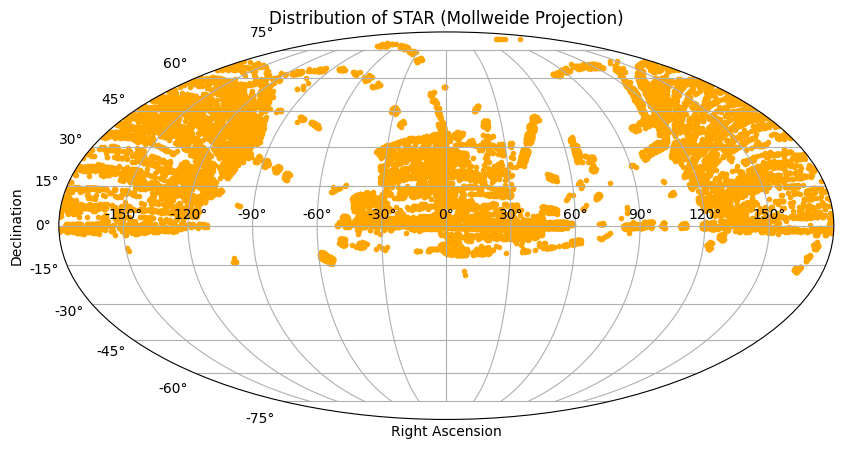

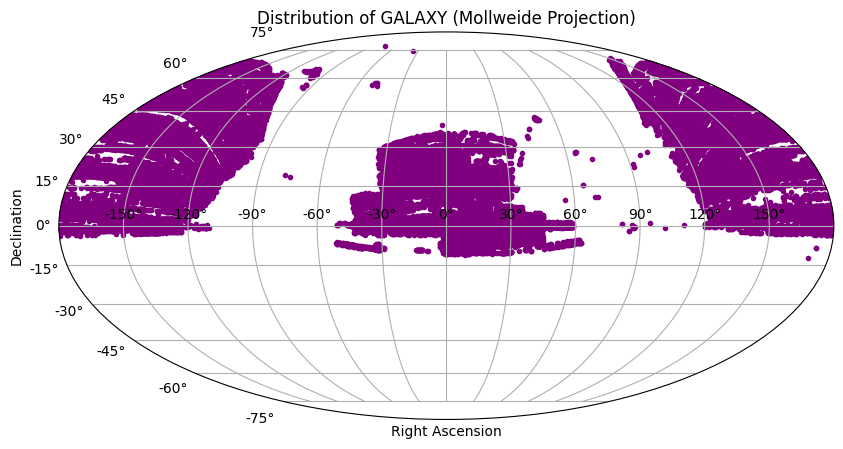

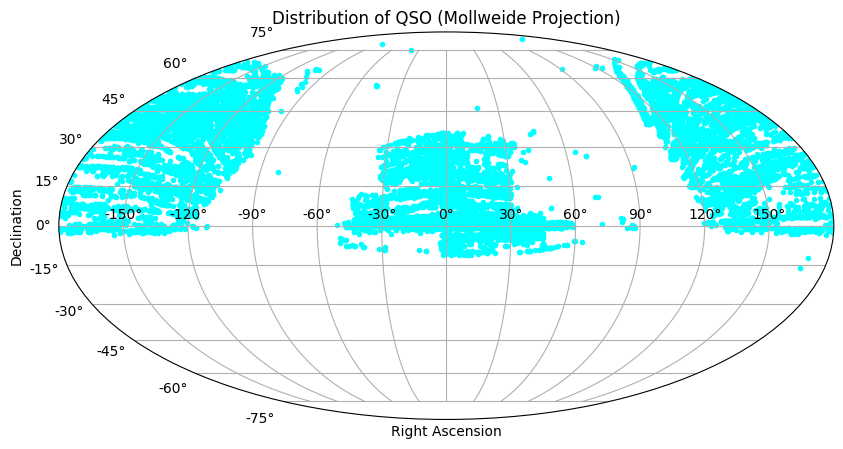

In [33]:


from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

# Extract alpha, delta, and class
alpha = stellar_data['alpha']
delta = stellar_data['delta']
classes = stellar_data['class']

# Convert to SkyCoord objects
coords = SkyCoord(alpha, delta, unit='deg')

# Creating a Mollweide projection for stars only
plt.figure(figsize=(10, 6))
plt.subplot(projection="mollweide")
plt.scatter(coords[classes == 'STAR'].ra.wrap_at(180 * u.deg).radian,
            coords[classes == 'STAR'].dec.radian,
            marker='.', color='orange', label='STAR')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.title(f'Distribution of STAR (Mollweide Projection)')
plt.grid(True)
plt.show()

# Creating a Mollweide projection for galaxies only
plt.figure(figsize=(10, 6))
plt.subplot(projection="mollweide")
plt.scatter(coords[classes == 'GALAXY'].ra.wrap_at(180 * u.deg).radian,
            coords[classes == 'GALAXY'].dec.radian,
            marker='.', color='purple', label='GALAXY')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.title(f'Distribution of GALAXY (Mollweide Projection)')
plt.grid(True)
plt.show()

# Creating a Mollweide projection for quasars only
plt.figure(figsize=(10, 6))
plt.subplot(projection="mollweide")
plt.scatter(coords[classes == 'QSO'].ra.wrap_at(180 * u.deg).radian,
            coords[classes == 'QSO'].dec.radian,
            marker='.', color='cyan', label='QSO')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.title(f'Distribution of QSO (Mollweide Projection)')
plt.grid(True)
plt.show()

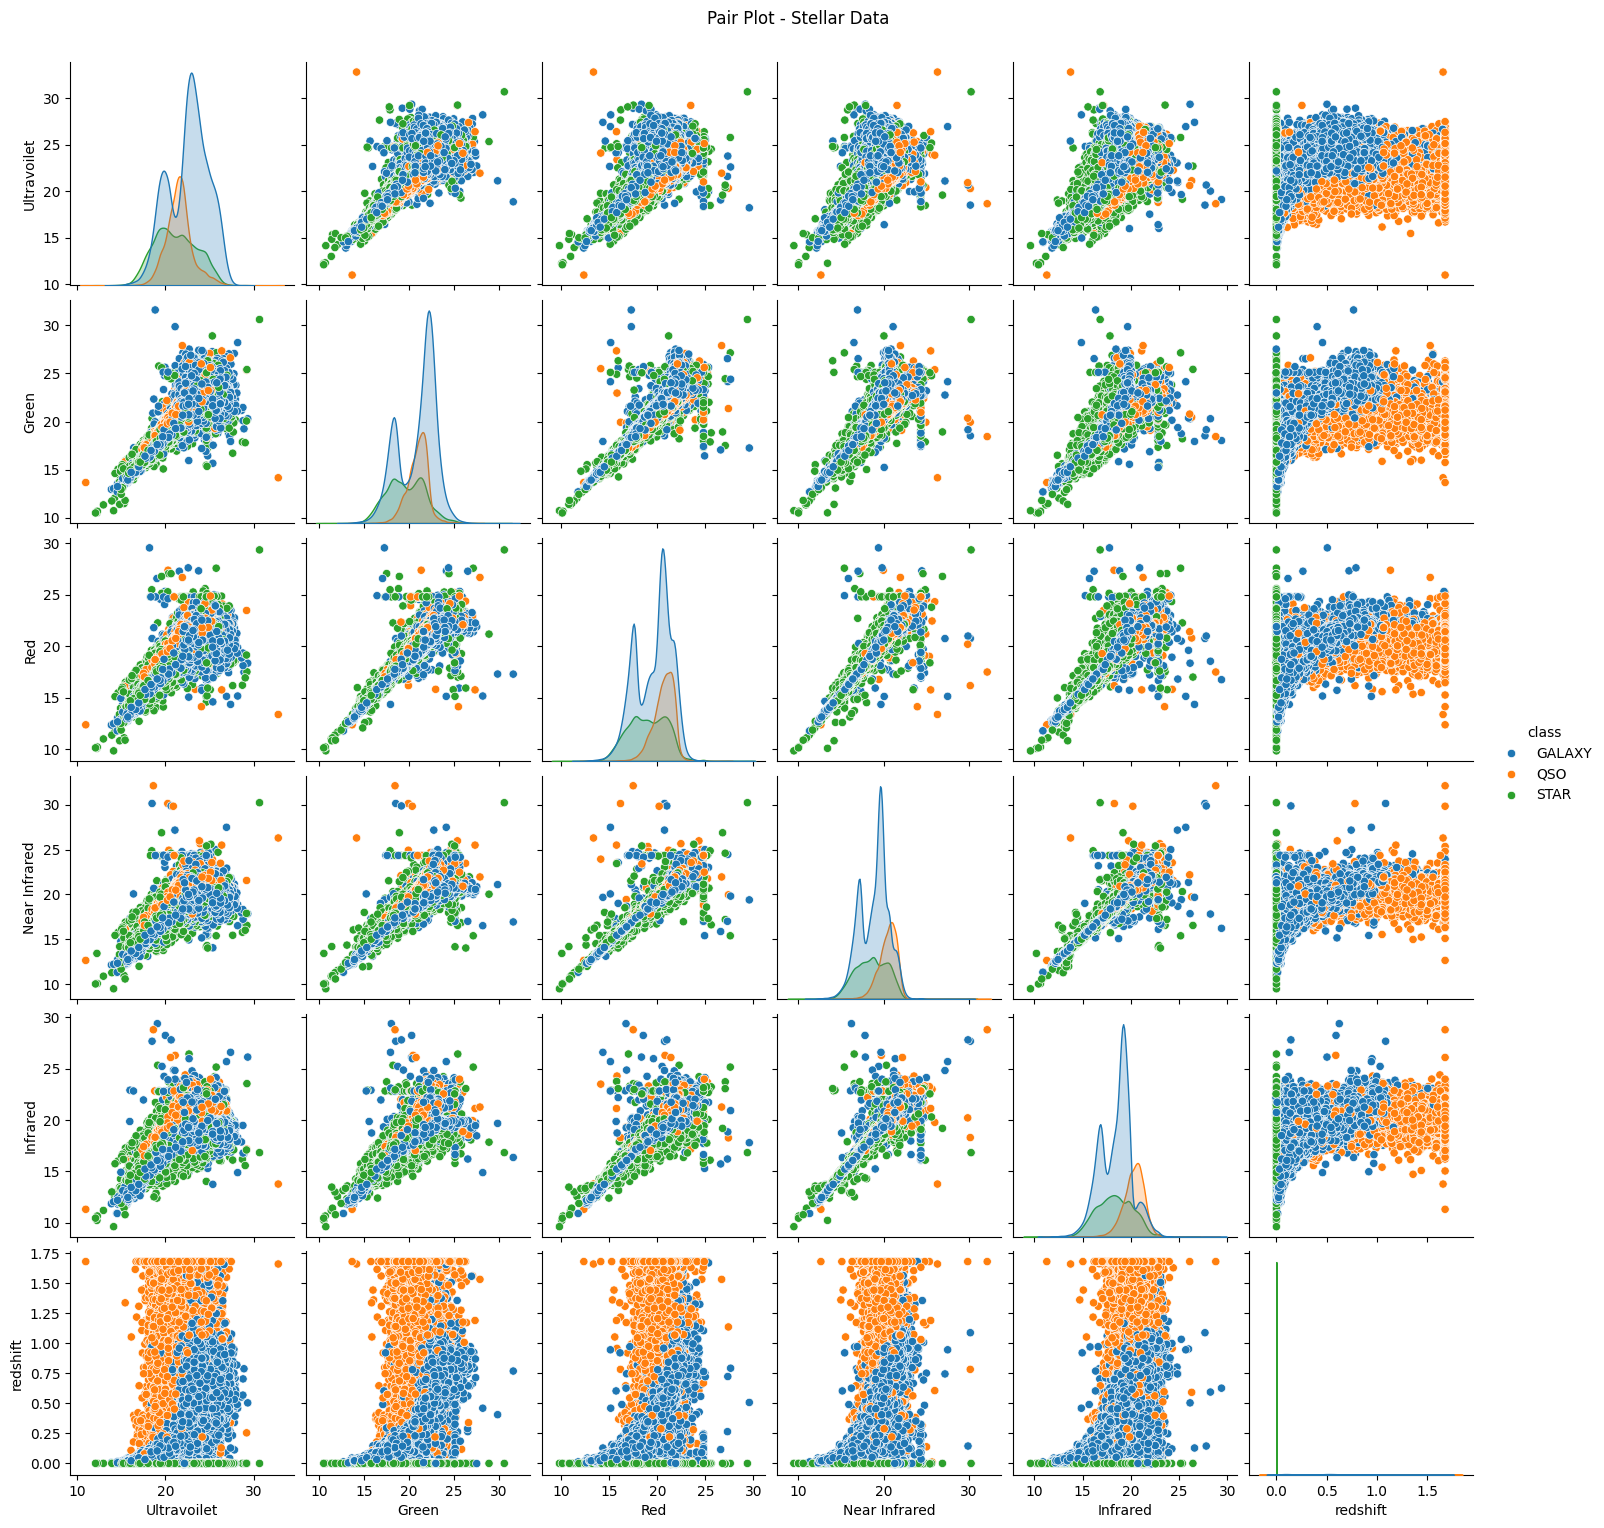

In [34]:
P = sns.pairplot(data=new_df_cap[['Ultravoilet', 'Green', 'Red', 'Near Infrared', 'Infrared','redshift','class']], hue='class')
P.fig.suptitle(t='Pair Plot - Stellar Data', y=1.02)
plt.show()



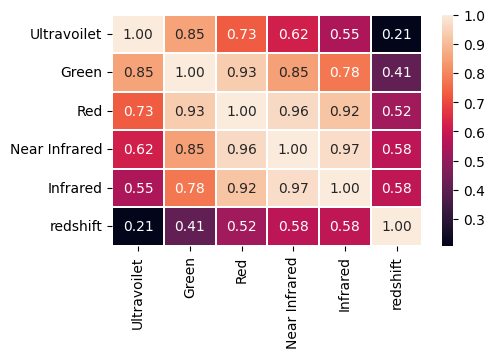

In [35]:
plt.figure(figsize=(5, 3))
sns.heatmap(data=new_df_cap[['Ultravoilet', 'Green', 'Red', 'Near Infrared', 'Infrared','redshift']].corr(),
            annot=True, fmt='.2f', linewidths=0.1)
plt.show()

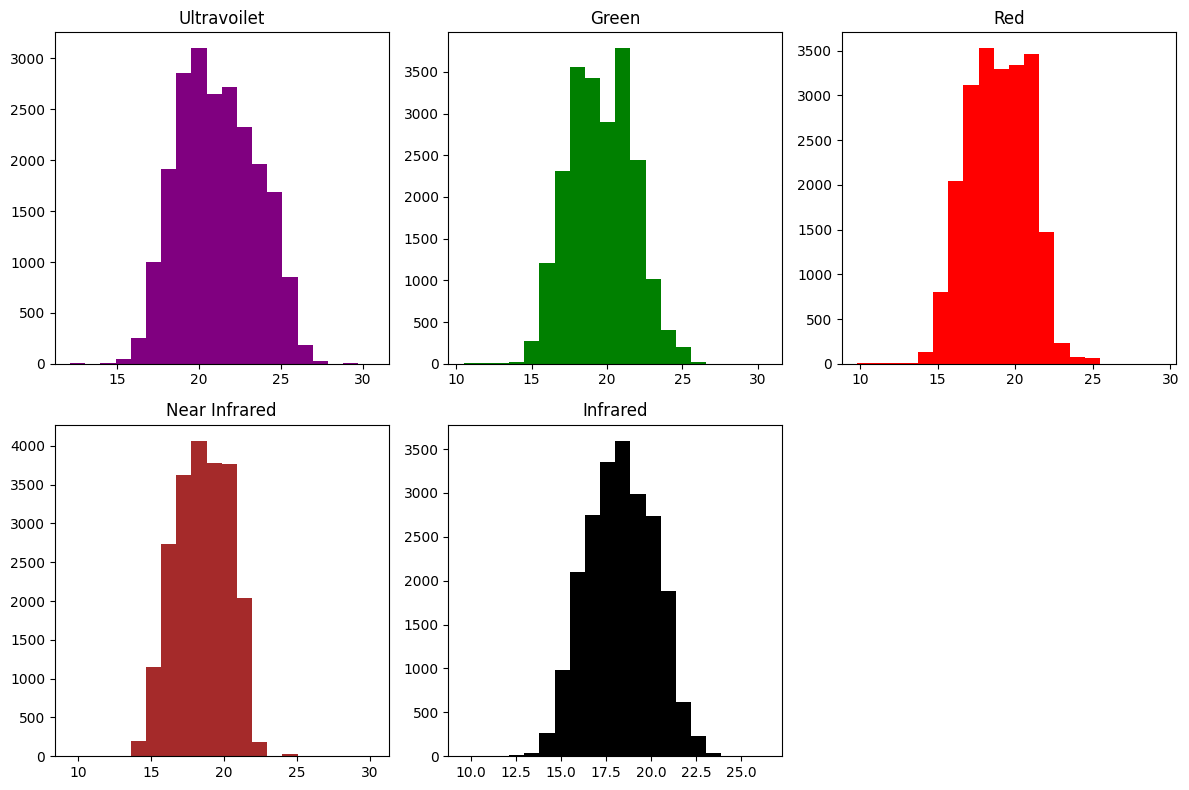

In [36]:
import matplotlib.pyplot as plt

# Filter data for galaxies only
galaxy_data = stellar_data[stellar_data['class'] == 'STAR']

# Select features and corresponding colors
features = {
    'Ultravoilet': 'purple',
    'Green': 'green',
    'Red': 'red',
    'Near Infrared': 'brown',
    'Infrared': 'black'
}

# Create histograms with specified colors
plt.figure(figsize=(12, 8))
for i, (feature, color) in enumerate(features.items()):
  plt.subplot(2, 3, i+1)
  plt.hist(galaxy_data[feature], bins=20, color=color)
  plt.title(feature)
plt.tight_layout()
plt.show()

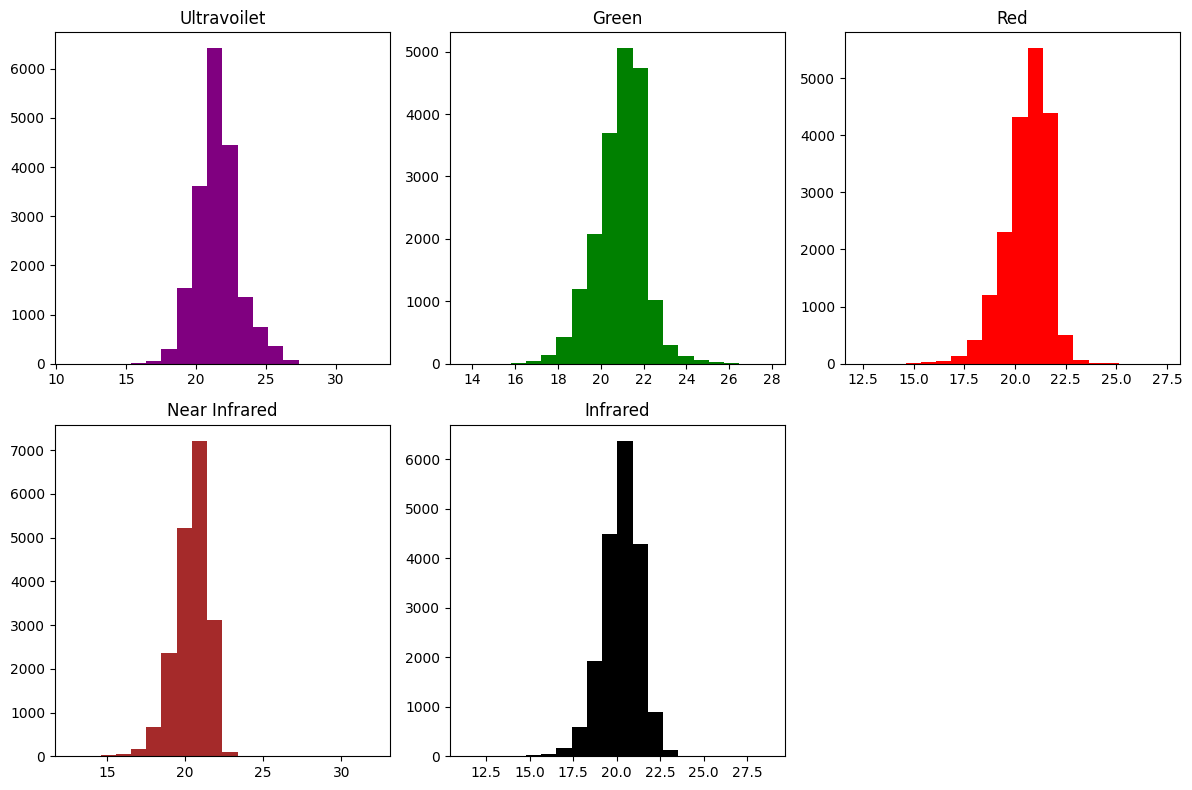

In [37]:
import matplotlib.pyplot as plt

# Filter data for galaxies only
galaxy_data = stellar_data[stellar_data['class'] == 'QSO']

# Select features and corresponding colors
features = {
    'Ultravoilet': 'purple',
    'Green': 'green',
    'Red': 'red',
    'Near Infrared': 'brown',
    'Infrared': 'black'
}

# Create histograms with specified colors
plt.figure(figsize=(12, 8))
for i, (feature, color) in enumerate(features.items()):
  plt.subplot(2, 3, i+1)
  plt.hist(galaxy_data[feature], bins=20, color=color)
  plt.title(feature)
plt.tight_layout()
plt.show()

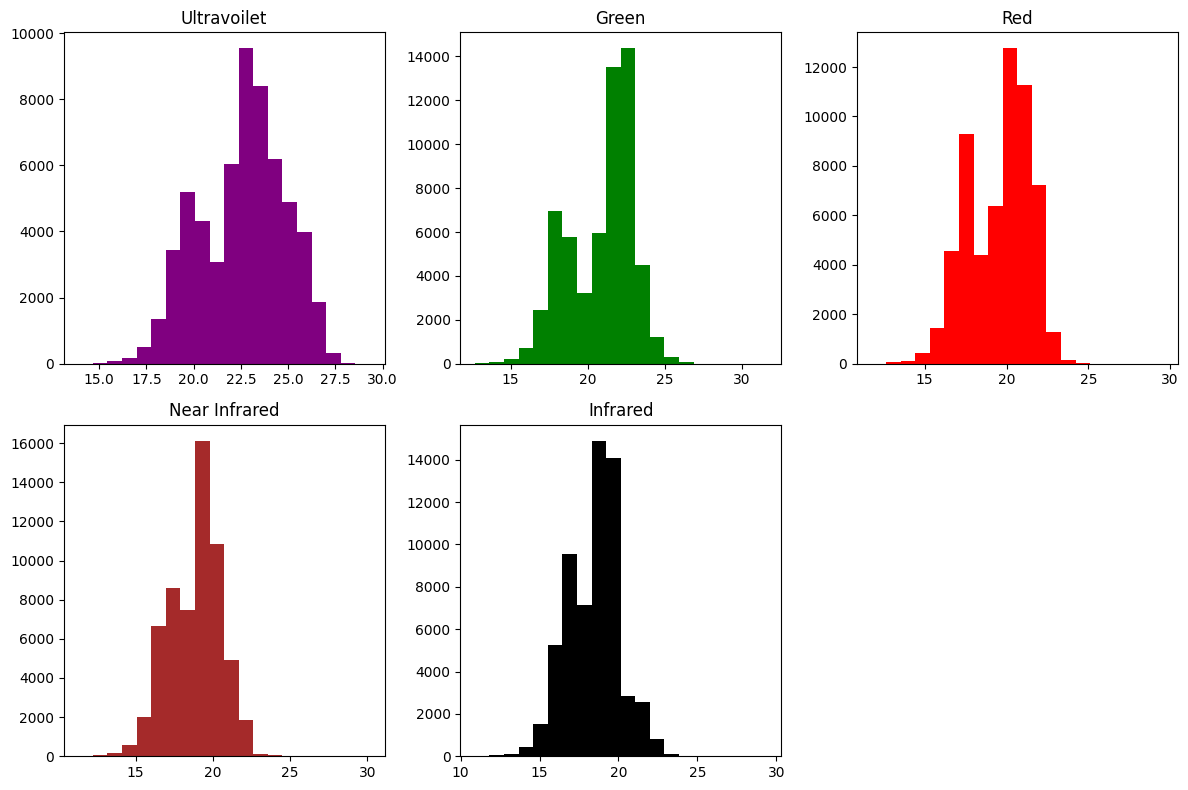

In [38]:
import matplotlib.pyplot as plt

# Filter data for galaxies only
galaxy_data = stellar_data[stellar_data['class'] == 'GALAXY']

# Select features and corresponding colors
features = {
    'Ultravoilet': 'purple',
    'Green': 'green',
    'Red': 'red',
    'Near Infrared': 'brown',
    'Infrared': 'black'
}

# Create histograms with specified colors
plt.figure(figsize=(12, 8))
for i, (feature, color) in enumerate(features.items()):
  plt.subplot(2, 3, i+1)
  plt.hist(galaxy_data[feature], bins=20, color=color)
  plt.title(feature)
plt.tight_layout()
plt.show()

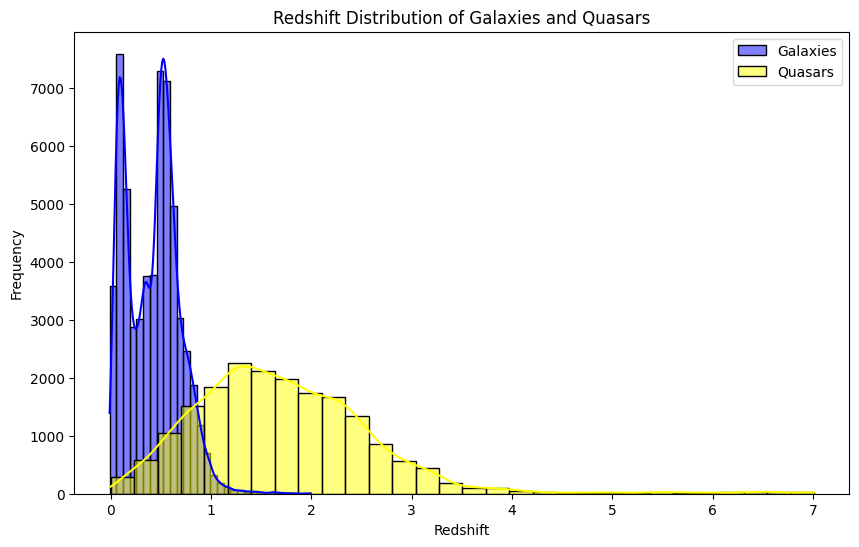

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a combined histogram for redshift distribution
plt.figure(figsize=(10, 6))
sns.histplot(stellar_data[stellar_data['class'] == 'GALAXY']['redshift'], bins=30, kde=True, color='blue', label='Galaxies')
sns.histplot(stellar_data[stellar_data['class'] == 'QSO']['redshift'], bins=30, kde=True, color='yellow', label='Quasars')
plt.title('Redshift Distribution of Galaxies and Quasars')
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [40]:
features = ['alpha', 'delta', 'Ultravoilet', 'Green', 'Red', 'Near Infrared', 'Infrared','redshift']


In [41]:
X = stellar_data[features]
y = stellar_data["class"].values

In [42]:
print(X.columns)
print("The shape of X: {}".format(X.shape))
print("The shape of y: {}".format(y.shape))


Index(['alpha', 'delta', 'Ultravoilet', 'Green', 'Red', 'Near Infrared',
       'Infrared', 'redshift'],
      dtype='object')
The shape of X: (99999, 8)
The shape of y: (99999,)


In [43]:
from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test) = train_test_split(X, y,stratify=y, test_size=0.20, random_state=0)
(X_train,X_cv,y_train,y_cv) = train_test_split(X_train, y_train, stratify=y_train, test_size=0.20, random_state=0)

In [44]:
print("X_train dataset: {}".format(X_train.shape))
print(" X_cv dataset: {}".format(X_cv.shape))
print(" X_test dataset: {}".format(X_test.shape))

X_train dataset: (63999, 8)
 X_cv dataset: (16000, 8)
 X_test dataset: (20000, 8)


In [45]:
print(" y_train dataset: {}".format(y_train.shape))
print(" y_cv dataset: {}".format(y_cv.shape))
print(" y_test dataset: {}".format(y_test.shape))

 y_train dataset: (63999,)
 y_cv dataset: (16000,)
 y_test dataset: (20000,)


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
X_train = scaling.fit_transform(X=X_train)
X_cv = scaling.transform(X=X_cv)
X_test = scaling.transform(X=X_test)

In [47]:
def dataframe(ar, cols):
    df = pd.DataFrame(data=ar, columns=cols)
    return df

In [48]:
train_df_fea = dataframe(ar=X_train, cols=features)
cv_df_fea = dataframe(ar=X_cv, cols=features)
test_df_fea = dataframe(ar=X_test, cols=features)

In [49]:
def featurize(df):
    df['Green-Red'] = df['Green'] - df['Red']
    df['Near Infrared-Infrared'] = df['Near Infrared'] - df['Infrared']
    df['Ultravoilet-Red'] = df['Ultravoilet'] - df['Red']
    df['Near Infrared-Red'] = df['Near Infrared'] - df['Red']
    df['Infrared-Red'] = df['Infrared'] - df['Red']
    return df

In [50]:
train_df_fea = featurize(df=train_df_fea)
cv_df_fea = featurize(df=cv_df_fea)
test_df_fea = featurize(df=test_df_fea)

In [51]:
fea_cols = ['Ultravoilet', 'Green', 'Red', 'redshift', 'Green-Red', 'Near Infrared-Infrared', 'Ultravoilet-Red', 'Near Infrared-Red', 'Infrared-Red']

print(fea_cols)


['Ultravoilet', 'Green', 'Red', 'redshift', 'Green-Red', 'Near Infrared-Infrared', 'Ultravoilet-Red', 'Near Infrared-Red', 'Infrared-Red']


In [52]:
X_train_fea = train_df_fea[fea_cols].values
X_cv_fea = cv_df_fea[fea_cols].values
X_test_fea = test_df_fea[fea_cols].values

In [53]:
import os
def export_data(data, target, f_name):
    if os.path.isdir('./stellar'):
        pass
    else:
        os.mkdir(path='./stellar')

    data['class'] = target
    data.to_csv(path_or_buf=os.path.join('./stellar', f_name), index=None)
    print("The data is exported to '{}'.".format(f_name))

In [54]:
export_data(data=train_df_fea[fea_cols], target=y_train,
            f_name='train_fea.csv')

The data is exported to 'train_fea.csv'.


In [55]:
export_data(data=cv_df_fea[fea_cols], target=y_cv,
            f_name='cv_fea.csv')

The data is exported to 'cv_fea.csv'.


In [56]:
export_data(data=test_df_fea[fea_cols], target=y_test,
            f_name='test_fea.csv')

The data is exported to 'test_fea.csv'.


In [57]:
export_data(data=test_df_fea[features], target=y_test,
            f_name='test_data.csv')

The data is exported to 'test_data.csv'.


In [58]:
train_fea_df = pd.read_csv(filepath_or_buffer='./stellar/train_fea.csv')
cv_fea_df = pd.read_csv(filepath_or_buffer='./stellar/cv_fea.csv')
test_fea_df = pd.read_csv(filepath_or_buffer='./stellar/test_fea.csv')

In [59]:
fea_col = list(train_fea_df.columns)
target= fea_col.pop()
l = cv_fea_df['class'].unique()
print("The features class is:\n",fea_col)
print("The target class is:",target)
print("The target labels are:",l)

The features class is:
 ['Ultravoilet', 'Green', 'Red', 'redshift', 'Green-Red', 'Near Infrared-Infrared', 'Ultravoilet-Red', 'Near Infrared-Red', 'Infrared-Red']
The target class is: class
The target labels are: ['GALAXY' 'QSO' 'STAR']


In [60]:
X_train = train_fea_df[fea_cols].values
y_train = train_fea_df[target].values

X_cv = cv_fea_df[fea_cols].values
y_cv = cv_fea_df[target].values

X_test = test_fea_df[fea_cols].values
y_test = test_fea_df[target].values

In [61]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(63999, 9) (63999,)
(16000, 9) (16000,)
(20000, 9) (20000,)


In [62]:
from sklearn.metrics import confusion_matrix
def plot_heatmap(matrix, title, l):
    sns.heatmap(data=matrix, annot=True, fmt='.2f', linewidths=0.1,
                xticklabels=l, yticklabels=l, cmap="crest")
    plt.xlabel(xlabel='Predicted Class')
    plt.ylabel(ylabel='Actual Class')
    plt.title(label=title, fontsize=10)

In [63]:
def plot_confusion_matrix(y_true, y_pred, l):
    cmat = confusion_matrix(y_true=y_true, y_pred=y_pred, l=l)
    pmat = cmat / cmat.sum(axis=0)
    print("Column sum of precision matrix: {}".format(pmat.sum(axis=0)))
    rmat = ((cmat.T) / (cmat.sum(axis=1).T)).T
    print("Row sum of recall matrix:       {}".format(rmat.sum(axis=1)))

    plt.figure(figsize=(15, 3))
    plt.subplot(131)
    plot_heatmap(matrix=cmat, title='Confusion Matrix', l=l)
    plt.subplot(132)
    plot_heatmap(matrix=pmat, title='Precision Matrix', l=l)
    plt.subplot(133)
    plot_heatmap(matrix=rmat, title='Recall Matrix', l=l)
    plt.show()


In [64]:
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
def reporter(clf, X, y, title, l, best=None):
    """
    This functions generates the report.

    Parameters
    ----------
    `clf`: classifier object
    `X`: features
    `y`: target
    `title`: title of the report
    `labels`: target values
    `best`: best parameters which are learned

    Returns logloss.
    """
    pred = clf.predict_proba(X=X)

    loss = log_loss(y_true=y, y_pred=pred)
    loss = np.round(a=loss, decimals=3)

    cm_pred = clf.predict(X=X)

    print(title)
    if best is None:
        print("Logloss: {}".format(loss))
    else:
        print("Logloss: {}".format(loss))
        print("Best parameters: {}".format(best))

    plot_confusion_matrix(y_true=y, y_pred=cm_pred, l=l)

    print(classification_report(y_true=y, y_pred=cm_pred))
    return loss

In [65]:
from sklearn.model_selection import RandomizedSearchCV
def tuner(clf, dist, X, y):
    rs_clf = RandomizedSearchCV(estimator=clf, random_state=0, n_jobs=-1,
                                param_distributions=dist)
    search = rs_clf.fit(X=X, y=y)
    return search.best_params_

In [66]:
def get_model_path(model_name):
    if os.path.isdir('./model_dumps'):
        pass
    else:
        os.mkdir(path='./model_dumps')

    model_path = os.path.join('./model_dumps', model_name)
    return model_path

In [67]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
def support_vector_classifier(X_train, y_train,X_cv, y_cv, X_test,y_test,dist,model_name,l=l):
    model_path = get_model_path(model_name=model_name)

    if not os.path.isfile(path=model_path):
        clf = SVC(random_state=42, class_weight='balanced')

        best = tuner(clf=clf, dist=dist, X=X_train, y=y_train)

        clf = SVC(C=best['C'], random_state=42, class_weight='balanced')
        clf.fit(X=X_train, y=y_train)

        sig_clf = CalibratedClassifierCV(base_estimator=clf)
        sig_clf.fit(X=X_train, y=y_train)

        with open(file=model_path, mode='wb') as m_pkl:
            pickle.dump(obj=(clf, sig_clf, best), file=m_pkl)
        print("Model saved into the disk.\n")
    else:
        with open(file=model_path, mode='rb') as m_pkl:
            clf, sig_clf, best = pickle.load(file=m_pkl)
        print("Loaded the saved model from the disk.\n")

    train_loss = reporter(clf=sig_clf, X=X_train, y=y_train,
                       title='Train', best=best, l=l)
    cv_loss = reporter(clf=sig_clf, X=X_cv, y=y_cv,
                       title='Cross Validation', best=best, l=l)
    test_loss = reporter(clf=sig_clf, X=X_test, y=y_test,
                       title='Test', best=best, l=l)

    return best, train_loss, cv_loss, test_loss

In [ ]:
import os
model_name = 'model_support_vector_classifier.pkl'

dist = dict(C=[10 ** x for x in range(-4, 3)])

(svc_best,
 svc_train_loss,
 svc_cv_loss,
 svc_test_loss) = support_vector_classifier(X_train=X_train,
                                          y_train=y_train,
                                          X_cv=X_cv,
                                          y_cv=y_cv,
                                          X_test=X_test,
                                          y_test=y_test,
                                          dist=dist,
                                          model_name=model_name)

# New Section